In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.preprocessing import LabelEncoder  

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/First combination/preprocessed.csv')


In [3]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,1,5,0
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,4,6,5
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,4,4,3
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,3,3,0
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551,1,5,0
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382,1,3,3
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768,2,3,0
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726,3,4,3


## Model adjustment

In [4]:
X = df.drop(['price', 'cut', 'color', 'clarity'], axis =1)

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)


### Decision tree

In [5]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 14.1 µs


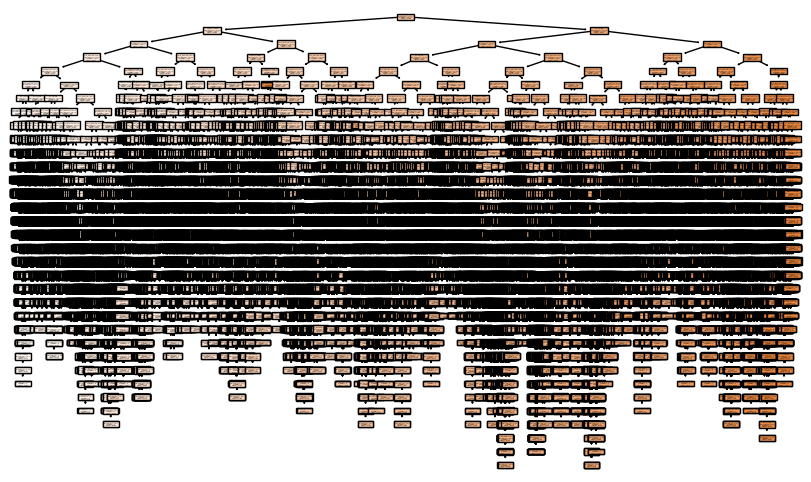

In [6]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();


In [7]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

3.1622776601683795

In [8]:
# max depth

print(regressor.tree_.max_depth)

33


In [9]:
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [10]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [11]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,9.109999e-02,1.725074e-02,1.313421e-01,0.983108,test,Decission Tree I
1,2.061000e-17,2.366778e-32,1.538434e-16,1.000000,train,Decission Tree I


In [12]:
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [13]:
%time
gs.fit(X_train, y_train)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 14.1 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.207, test=-0.207) total time=   0.5s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.536, test=-0.528) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.167, test=-0.169) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.509, test=-0.523) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.193, test=-0.192) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.161, test=-0.170) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.214, test=-0.220) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=

[CV 9/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.093, test=-0.091) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.054, test=-0.058) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.064, test=-0.065) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.067, test=-0.068) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.098, test=-0.099) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.063, test=-0.060) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.067, test=-0.069) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.071, test=-0.073) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3

[CV 6/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.059, test=-0.059) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.060, test=-0.065) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.060, test=-0.061) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.055, test=-0.051) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.055, test=-0.061) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.063, test=-0.063) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.055, test=-0.056) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.060, test=-0.060) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=6, min_

[CV 7/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.053, test=-0.058) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.052, test=-0.055) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.056, test=-0.053) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.164, test=-0.171) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.068, test=-0.066) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.055, test=-0.055) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.061, test=-0.063) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.060, test=-0.057) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=2, 

[CV 8/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.045, test=-0.047) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.044, test=-0.045) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.048, test=-0.049) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.045, test=-0.047) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.044, test=-0.043) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.049, test=-0.050) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.044, test=-0.045) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=5, m

[CV 7/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.195, test=-0.197) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.069, test=-0.073) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.098, test=-0.093) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.203, test=-0.213) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.412, test=-0.422) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.072, test=-0.070) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.182, test=-0.199) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.083, test=-0.083) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, 

[CV 3/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.038, test=-0.039) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.042, test=-0.041) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.042, test=-0.043) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.036, test=-0.035) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.041, test=-0.044) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.053, test=-0.055) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.041, test=-0.041) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.038, test=-0.041) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=4, min_

[CV 3/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.034, test=-0.035) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.039, test=-0.039) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.034, test=-0.037) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.034, test=-0.035) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.036, test=-0.040) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=6, min_

[CV 2/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.032, test=-0.033) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.029, test=-0.029) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.039, test=-0.040) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.033, test=-0.033) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.033, test=-0.032) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.032, test=-0.035) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.036, test=-0.038) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.043, test=-0.043) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=3, min_

[CV 5/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.038, test=-0.040) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.031, test=-0.033) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.027, test=-0.029) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.026, test=-0.030) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.028, test=-0.028) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.029, test=-0.031) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.029, test=-0.031) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.028, test=-0.029) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=5, mi

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [14]:

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=100)

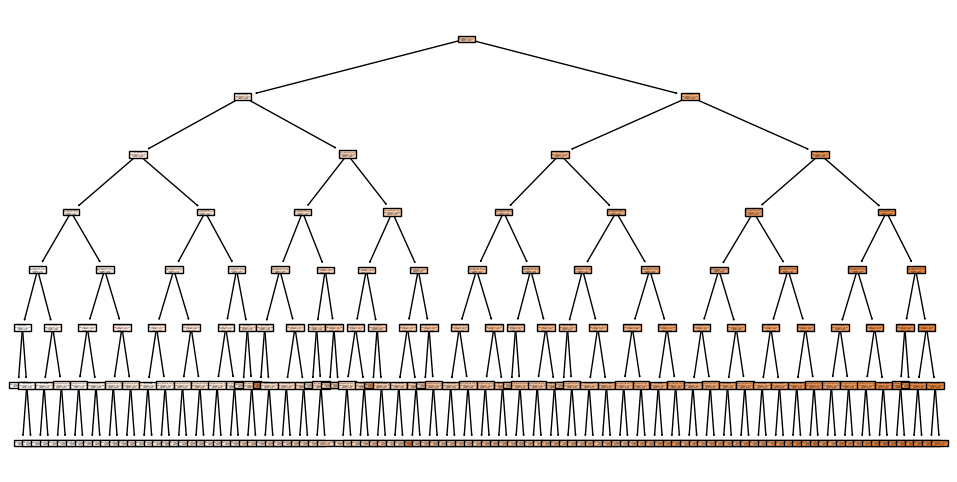

In [15]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);


In [36]:
fig.savefig("decision_tree.png", facecolor="white")

In [16]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- y <= 5.61
|   |--- carat <= 0.45
|   |   |--- x <= 4.61
|   |   |   |--- carat <= 0.30
|   |   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |   |--- z <= 2.43
|   |   |   |   |   |   |--- value: [5.95]
|   |   |   |   |   |--- z >  2.43
|   |   |   |   |   |   |--- x <= 4.14
|   |   |   |   |   |   |   |--- value: [6.11]
|   |   |   |   |   |   |--- x >  4.14
|   |   |   |   |   |   |   |--- value: [6.21]
|   |   |   |   |--- clarity_encoded >  4.50
|   |   |   |   |   |--- x <= 4.08
|   |   |   |   |   |   |--- x <= 3.99
|   |   |   |   |   |   |   |--- value: [6.22]
|   |   |   |   |   |   |--- x >  3.99
|   |   |   |   |   |   |   |--- value: [6.32]
|   |   |   |   |   |--- x >  4.08
|   |   |   |   |   |   |--- color_encoded <= 3.50
|   |   |   |   |   |   |   |--- value: [6.32]
|   |   |   |   |   |   |--- color_encoded >  3.50
|   |   |   |   |   |   |   |--- value: [6.49]
|   |   |   |--- carat >  0.30
|   |   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |  

## Prediction

In [17]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [18]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [19]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.122841,0.026254,0.162029,0.974293,test,Decision tree II
1,0.121284,0.024619,0.156903,0.976261,train,Decision tree II


## Test

In [20]:
df1 = pd.read_csv("/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/First combination/reality.csv", index_col = 0)


In [21]:
df1

,id,carat,cut,color,clarity,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70,4,1,2
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26,1,1,2
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70,1,5,2
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59,1,5,0
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,SI1,59.6,60.0,6.74,6.70,4.00,1,3,2
13481,13481,0.90,Very Good,D,SI1,62.1,60.0,6.14,6.20,3.83,3,5,2
13482,13482,0.30,Ideal,F,VS2,62.1,53.3,4.30,4.32,2.68,4,4,3
13483,13483,1.25,Ideal,I,SI1,59.6,59.0,7.01,7.09,4.20,4,1,2


In [22]:
X_reality = df1.drop(['cut', 'color', 'clarity'], axis=1)


In [23]:
X_reality_submision = best_tree.predict(X_reality)
X_reality_submision

array([6.19040388, 8.39282986, 9.65511039, ..., 6.47779184, 8.56234783,
       8.18050638])

In [24]:
submision1 = pd.DataFrame(X_reality_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.190404
1,1,8.392830
2,2,9.655110
3,3,7.755817
4,4,9.006964
...,...,...
13480,13480,8.548141
13481,13481,8.391614
13482,13482,6.477792
13483,13483,8.562348


In [25]:
submision1.to_csv("submission_david1.csv", index=False)

In [59]:
DFF = pd.read_csv("/Users/davidfernandez/Desktop/submission_david1.csv", index_col = 0)


DFF

,price
id,
0,6.215965
1,8.436482
2,9.523206
3,7.744552
4,8.618059
...,...
13477,8.555215
13478,8.362110
13479,6.471361
